# Training Tensorflow with mnist

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

## Load & Process Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalise data
x_train, x_test = x_train / 255.0, x_test / 255.0

## Model

In [33]:
xIn = layers.Input((28, 28))
xFlatten = layers.Flatten()(xIn)
x = layers.Dense(256, activation='relu')(xFlatten)
xDrop = layers.Dropout(0.1)(x)
x = layers.Dense(256, activation='relu')(xDrop)
xDrop = layers.Dropout(0.1)(x)
x = layers.Dense(256, activation='relu')(xDrop)
xDrop = layers.Dropout(0.1)(x)
xOut = layers.Dense(10, activation='softmax')(xDrop)

model = Model(xIn, xOut)
model.compile(optimizer=optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_70 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_71 (Dense)            (None, 256)               657

In [35]:
epochs = 10

history = model.fit(x_train, y_train,
    batch_size=256,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0329 - acc: 0.9892 - val_loss: 0.0767 - val_acc: 0.9800
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0297 - acc: 0.9902 - val_loss: 0.0767 - val_acc: 0.9790
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0238 - acc: 0.9922 - val_loss: 0.0731 - val_acc: 0.9819
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0214 - acc: 0.9927 - val_loss: 0.0783 - val_acc: 0.9796
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0210 - acc: 0.9932 - val_loss: 0.0729 - val_acc: 0.9818
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0194 - acc: 0.9936 - val_loss: 0.0934 - val_acc: 0.9780
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0218 - acc: 0.9929 - val_loss: 0.0745 - val_acc: 0.9818
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.

## Plot accuracy and loss

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


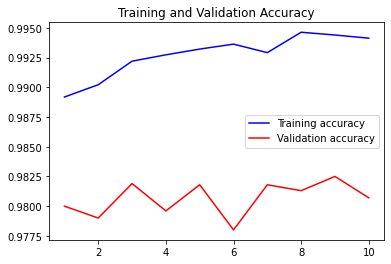

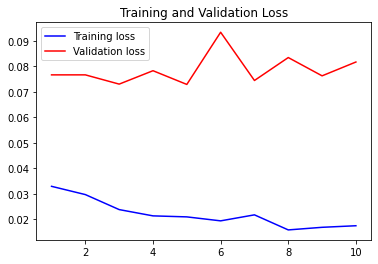

In [37]:
num_epochs = range(1, epochs + 1)

plt.plot(num_epochs, acc, 'b', label='Training accuracy')
plt.plot(num_epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(num_epochs, loss, 'b', label='Training loss')
plt.plot(num_epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()